# K-Means

Oövervakade inlärning, här har vi inget Y, vi vet inte resultatet. Här delar vi upp k-stycken klustarar kring ett medel. 

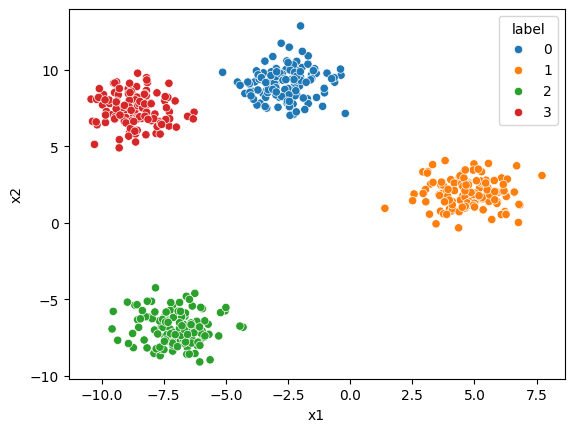

In [9]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd


X, y = make_blobs(500, centers=4, random_state=42, cluster_std=1)

data = pd.DataFrame([X[:, 0], X[:, 1],y]).T
data.columns = ["x1", "x2", "label"]

data["label"] = data.label.astype(int)
sns.scatterplot(data=data, x="x1", y="x2", hue="label", palette="tab10");

In [5]:
X = data.drop(["label"], axis=1)

- det är helt nödvendigt att skalera parametrana, standar eller normalisering
- finns inga klasser i en oövervakad
- behöver inte splita i tes och train

In [7]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)
scaled_X[:5]

array([[-0.81539333,  0.58938951],
       [-1.17344434, -1.55328827],
       [ 1.93881064, -0.27298895],
       [ 0.0928425 ,  0.73646712],
       [-0.43397474, -1.60921239]])

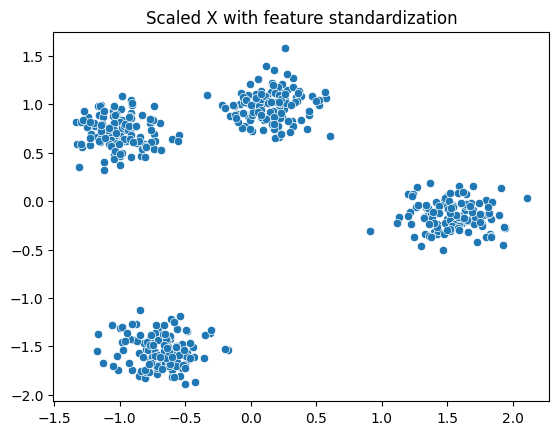

In [8]:
sns.scatterplot(x=scaled_X[:, 0], y=scaled_X[:, 1])
plt.title("Scaled X with feature standardization");

---
## k-means clustering

- k-means clustering is an unsupervised learning algorithm, which means that there are no labels

1. $k$ number of clusters are chosen
2. $k$ points are randomly selected as cluster centers
3. the nearest points to each cluster center are classified as that cluster
4. the center of the cluster is recalculated
5. repeat 3 and 4 until convergence

note that nearest points are defined by some distance metric

### Choose k

- plot an elbow plot of sum of squared distances (inertia in sklearn) and find the an inflexion point to choose $k$, i.e. the point with significant lower rate of change than before (note that this might be hard to find exact)
- domain skills, it's important to understand your dataset to find an adequate $k$ and also equally important to be able to know what the clusters represent
- note that it is hard to find correct number of clusters, and it is here the art and domain skills become more important


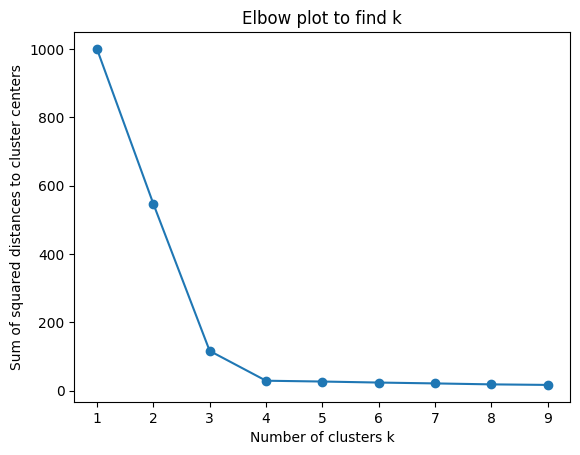

In [12]:
clusters = range(1, 10)

sum_squared_distances = [KMeans(k).fit(scaled_X).inertia_ for k in clusters]

fig, ax = plt.figure(), plt.axes()

ax.plot(clusters, sum_squared_distances, '-o')
ax.set(title="Elbow plot to find k", xlabel="Number of clusters k",
       ylabel="Sum of squared distances to cluster centers");


In [ ]:
# Mer exakt se vart k convegera mot noll och vilket k värde som skule kunna vara stopp värdet, eller det k vi skulle köra modellen på

SSD_diffrences = pd.Series(sum_squared_distances).diff()[1:]
SSD_diffrences.index = clusters[:-1]

SSD_diffrences

1   -453.099154
2   -430.805168
3    -87.308740
4     -2.376291
5     -2.983402
6     -2.523619
7     -2.794523
8     -1.612384
dtype: float64

---
## Silhouette score 

Note that it's usually not possible to plot the clusters, instead the silhouette score in combination with elbow plot can help in determining clusters. 

- silhouette score is a measure of cluster tightness

The silhoutte coefficient $S_i$ is calculated as 
$$S_i = \frac{b_i-a_i}{\max{\{a_i, b_i\}}}$$
,where 
- $a_i$ is mean distance between i and other points in the cluster it belongs to
- $b_i$ is the mean distance from i to clusters it doesn't belong to

Calculate average silhouette score for different $k$ clusters in the clustering algorithm, in this case KMeans. 

- silhouette coefficient is between -1 and 1
- value 1 -> very compact clusters
- value 0 -> overlapping clusters
- value -1 -> worst value

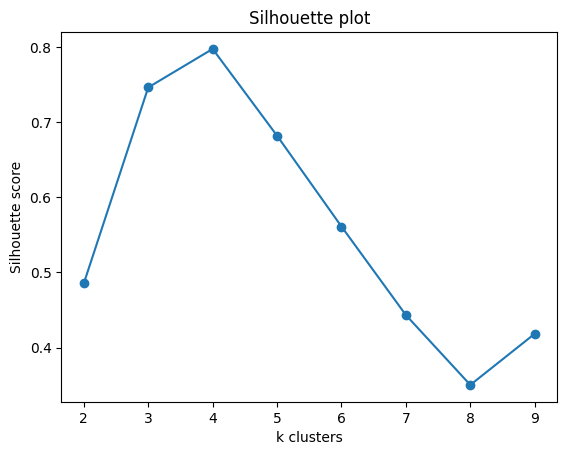

In [18]:
kmeans = [KMeans(n_clusters=k).fit(scaled_X) for k in clusters]

fig, ax = plt.figure(), plt.axes()

silhouette_list = [silhouette_score(scaled_X, kmean.labels_) for kmean in kmeans[1:]]
ax.plot(clusters[1:], silhouette_list, "o-")
ax.set(title = "Silhouette plot", xlabel = "k clusters", ylabel = "Silhouette score");

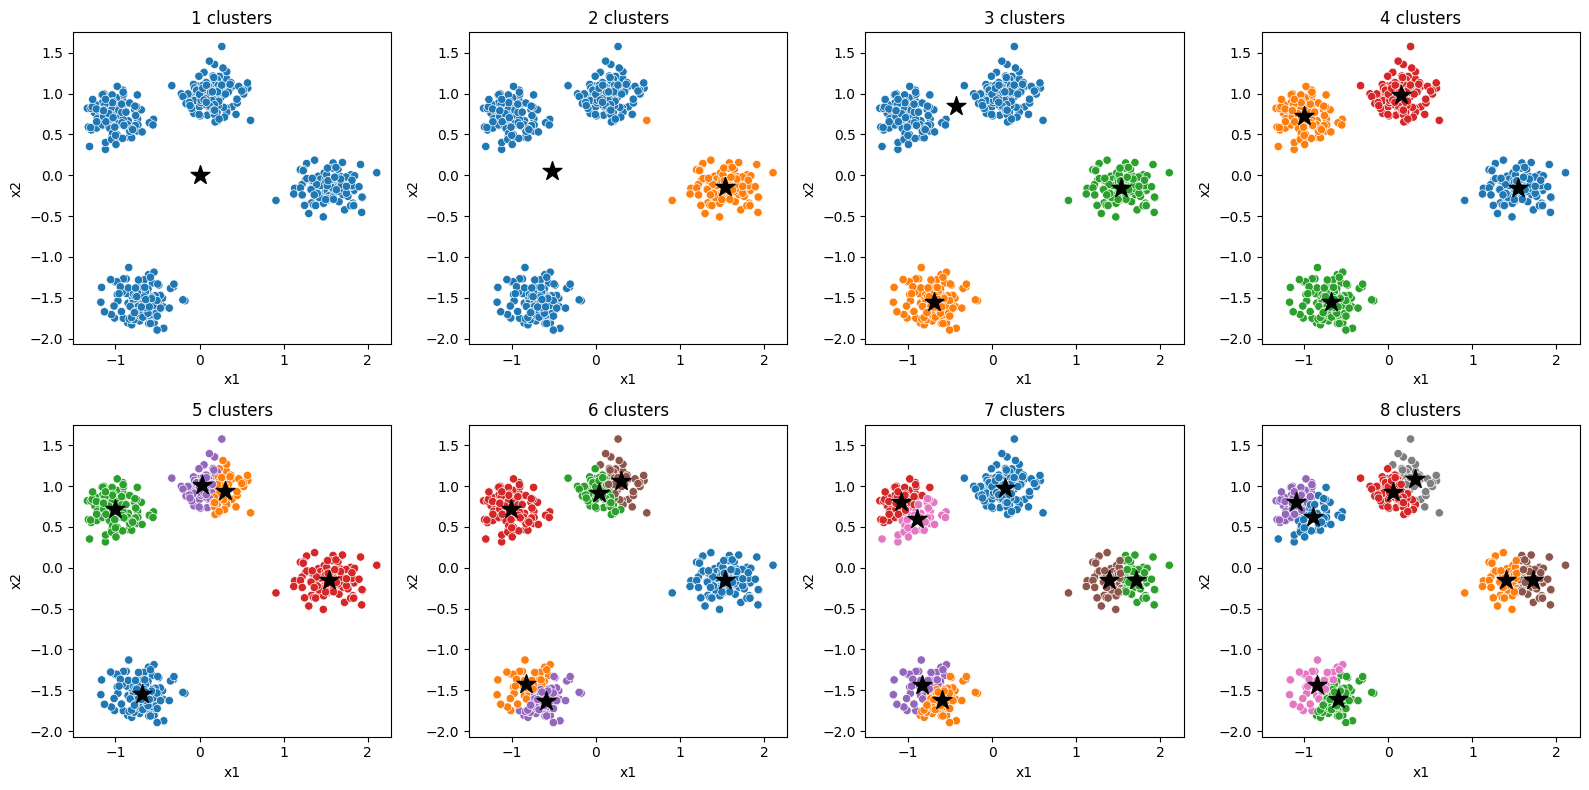

In [28]:
df_plot = pd.DataFrame(scaled_X, columns=["x1", "x2"])

number_plot = round(len(clusters)/2)

fig, axes = plt.subplots(2, number_plot, figsize=(16, 8))

for i, ax in enumerate(axes.flatten()):
    cluster_center = kmeans[i].cluster_centers_
    df_plot["labels"]= kmeans[i].labels_
    sns.scatterplot(df_plot, x="x1", y="x2", hue="labels", ax=ax, palette="tab10")

    ax.scatter(cluster_center[:, 0], cluster_center[:, 1], s = 200,
            marker = '*', color="black", label="centroid")
    ax.legend([],[], frameon = False)
    ax.set(title = f"{i+1} clusters")
plt.tight_layout()